In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

# we will skip 2001 - 2005 due to bad quality

# Create an empty list to store the DataFrames for each year
crimes_list = []

# Loop through the years 2010 to 2022 (inclusive)
for year in range(2010, 2023):
    # Create a string with the file name for the current year
    file_name = f'./{year}.csv'
    # Read the CSV file for the current year into a DataFrame
    df = pd.read_csv(file_name, error_bad_lines=False)
    # Append the DataFrame to the list
    crimes_list.append(df)

# Concatenate all the DataFrames in the list into a single DataFrame
crimes = pd.concat(crimes_list, ignore_index=False, axis=0)

# Delete the list of DataFrames to save memory
del crimes_list

# Print a message indicating that the dataset is ready
print('Dataset ready..')

# Print the shape of the DataFrame before dropping duplicates
print('Dataset Shape before drop_duplicate : ', crimes.shape)

# Drop duplicates based on the 'ID' and 'Case Number' columns
crimes.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)

# Print the shape of the DataFrame after dropping duplicates
print('Dataset Shape: ', crimes.shape)


/home/core/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2878: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Dataset ready..
Dataset Shape before drop_duplicate :  (3608150, 22)
Dataset Shape after drop_duplicate:  (3608150, 22)


In [2]:
crimes.drop([ 'Case Number', 'IUCR','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location'], inplace=True, axis=1)

In [3]:
#Let's have a look at the first 3 records and see if we see what we expect
crimes.head(3)

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Latitude,Longitude
0,11039140,01/01/2010 12:00:00 AM,055XX W FARRAGUT AVE,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,False,16.0,NaN,NaN,NaN,NaN
1,10342825,01/01/2010 12:00:00 AM,056XX W EASTWOOD AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,16.0,1137897.0,1930354.0,41.965032,-87.768376
2,10938629,01/01/2010 12:00:00 AM,043XX N MONTICELLO AVE,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,False,17.0,NaN,NaN,NaN,NaN


In [4]:
# convert dates to pandas datetime format
crimes.Date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
crimes.index = pd.DatetimeIndex(crimes.Date)

In [5]:
# of records X # of features
crimes.shape

(3608150, 13)

In [6]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3608150 entries, 2010-01-01 00:00:00 to 2022-12-07 23:59:00
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Block                 object        
 3   Primary Type          object        
 4   Description           object        
 5   Location Description  object        
 6   Arrest                bool          
 7   Domestic              bool          
 8   District              float64       
 9   X Coordinate          float64       
 10  Y Coordinate          float64       
 11  Latitude              float64       
 12  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 337.2+ MB


In [7]:
loc_to_change  = list(crimes['Location Description'].value_counts()[20:].index)
desc_to_change = list(crimes['Description'].value_counts()[20:].index)
#type_to_change = list(crimes['Primary Type'].value_counts()[20:].index)

crimes.loc[crimes['Location Description'].isin(loc_to_change) , crimes.columns=='Location Description'] = 'OTHER'
crimes.loc[crimes['Description'].isin(desc_to_change) , crimes.columns=='Description'] = 'OTHER'
#crimes.loc[crimes['Primary Type'].isin(type_to_change) , crimes.columns=='Primary Type'] = 'OTHER'


In [8]:
# we convert those 3 columns into 'Categorical' types -- works like 'factor' in R
crimes['Primary Type']         = pd.Categorical(crimes['Primary Type'])
crimes['Location Description'] = pd.Categorical(crimes['Location Description'])
crimes['Description']          = pd.Categorical(crimes['Description'])

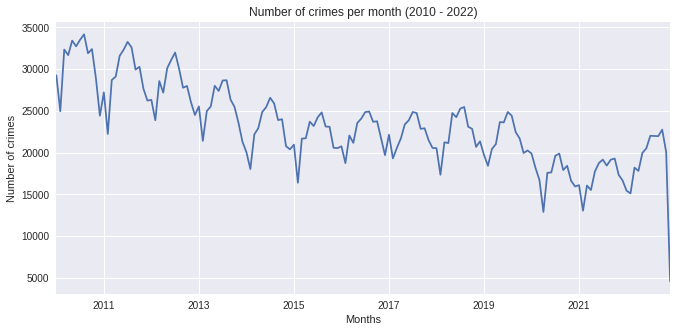

In [9]:
plt.figure(figsize=(11,5))
crimes.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2010 - 2022)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

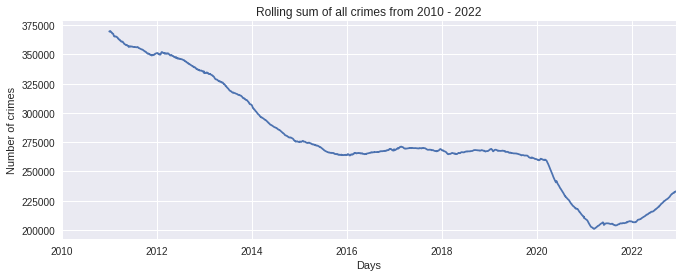

In [10]:
plt.figure(figsize=(11,4))
crimes.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2010 - 2022')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

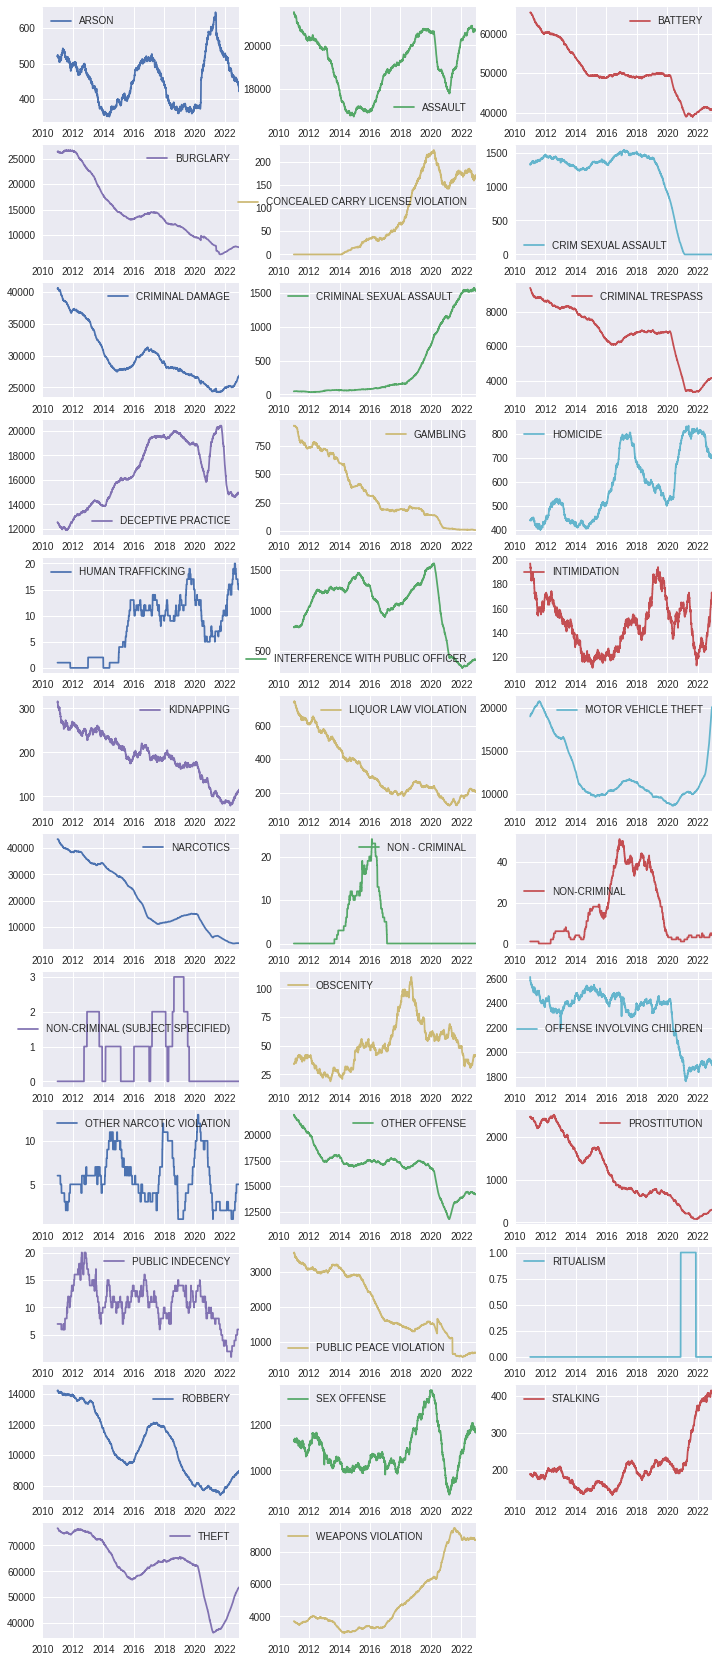

In [11]:
crimes_count_date = crimes.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=crimes.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

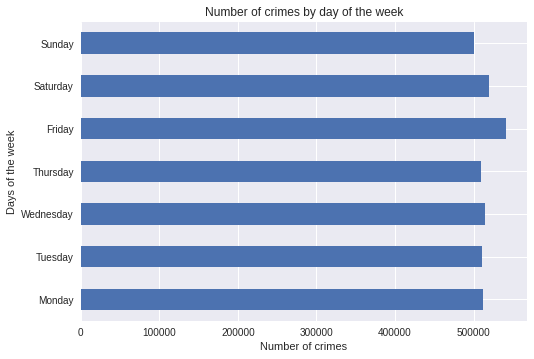

In [12]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes.groupby([crimes.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

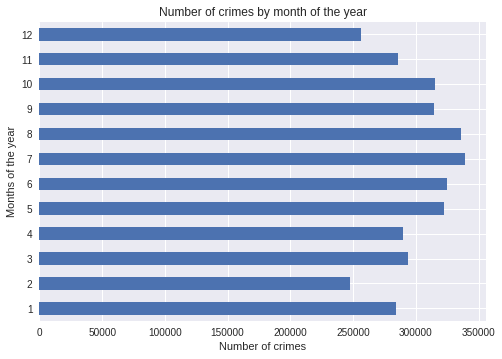

In [13]:
crimes.groupby([crimes.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

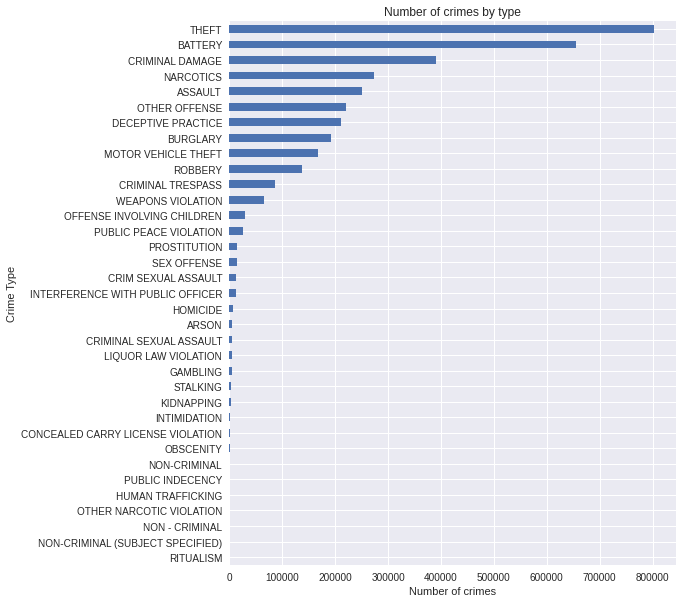

In [14]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

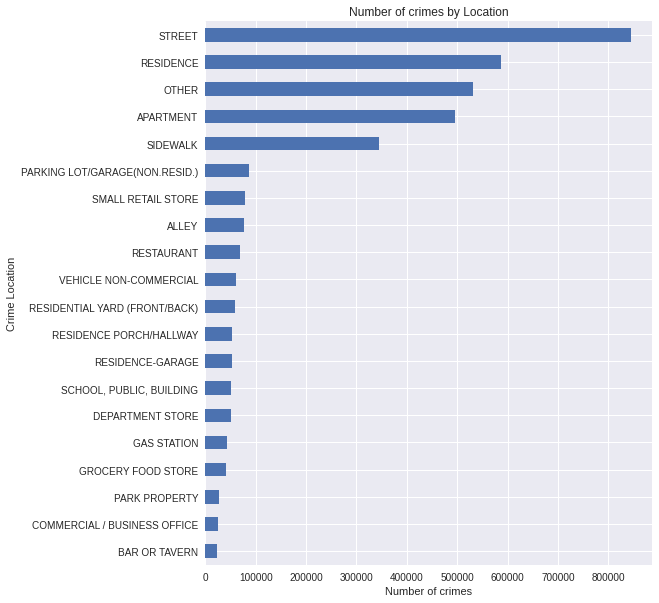

In [15]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

In [16]:
print(crimes.index)

# convert dates to pandas datetime format
crimes.Date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
crimes.index = pd.DatetimeIndex(crimes.Date)

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 00:00:00',
               '2010-01-01 00:00:00', '2010-01-01 00:00:00',
               '2010-01-01 00:00:00', '2010-01-01 00:00:00',
               '2010-01-01 00:00:00', '2010-01-01 00:00:00',
               '2010-01-01 00:00:00', '2010-01-01 00:00:00',
               ...
               '2022-12-07 23:40:00', '2022-12-07 23:40:00',
               '2022-12-07 23:45:00', '2022-12-07 23:49:00',
               '2022-12-07 23:49:00', '2022-12-07 23:50:00',
               '2022-12-07 23:51:00', '2022-12-07 23:52:00',
               '2022-12-07 23:58:00', '2022-12-07 23:59:00'],
              dtype='datetime64[ns]', name='Date', length=3608150, freq=None)


In [17]:
hour_by_location = crimes.pivot_table(values='ID', index='Location Description', columns=crimes.index.hour, aggfunc=np.size).fillna(0)
hour_by_type     = crimes.pivot_table(values='ID', index='Primary Type', columns=crimes.index.hour, aggfunc=np.size).fillna(0)
hour_by_week     = crimes.pivot_table(values='ID', index=crimes.index.hour, columns=crimes.index.day_name(), aggfunc=np.size).fillna(0)
hour_by_week     = hour_by_week[days].T # just reorder columns according to the the order of days
dayofweek_by_location = crimes.pivot_table(values='ID', index='Location Description', columns=crimes.index.dayofweek, aggfunc=np.size).fillna(0)
dayofweek_by_type = crimes.pivot_table(values='ID', index='Primary Type', columns=crimes.index.dayofweek, aggfunc=np.size).fillna(0)
location_by_type  = crimes.pivot_table(values='ID', index='Location Description', columns='Primary Type', aggfunc=np.size).fillna(0)

In [18]:
from sklearn.cluster import AgglomerativeClustering as AC

def scale_df(df,axis=0):
    '''
    A utility function to scale numerical values (z-scale) to have a mean of zero
    and a unit variance.
    '''
    return (df - df.mean(axis=axis)) / df.std(axis=axis)

def plot_hmap(df, ix=None, cmap='bwr'):
    '''
    A function to plot heatmaps that show temporal patterns
    '''
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]))
    plt.grid(False)
    plt.show()
    
def scale_and_plot(df, ix = None):
    '''
    A wrapper function to calculate the scaled values within each row of df and plot_hmap
    '''
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df_marginal_scaled.values), np.abs(np.min(df_marginal_scaled.values))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix)
    
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

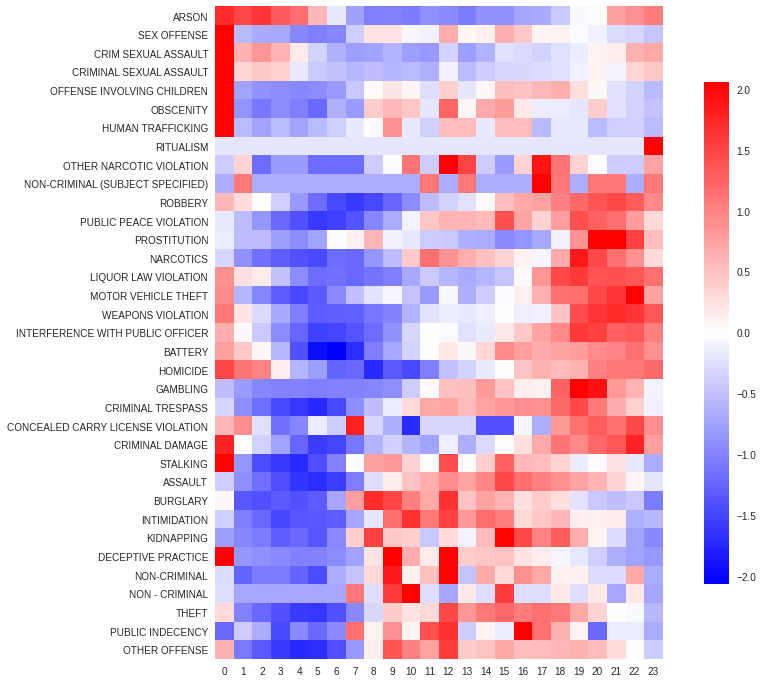

In [19]:
plt.figure(figsize=(15,12))
scale_and_plot(hour_by_type)

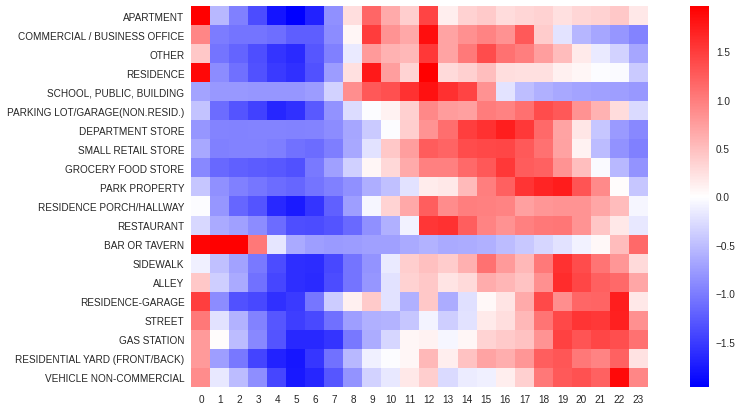

In [20]:
plt.figure(figsize=(15,7))
scale_and_plot(hour_by_location)

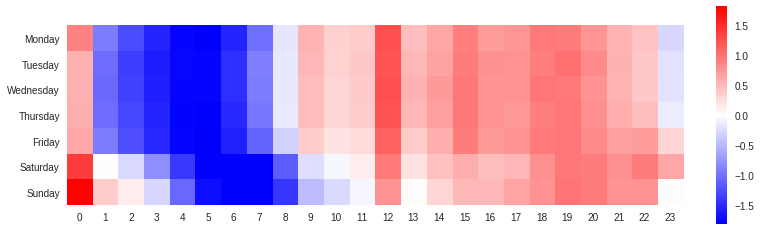

In [21]:
plt.figure(figsize=(12,4))
scale_and_plot(hour_by_week, ix=np.arange(7))

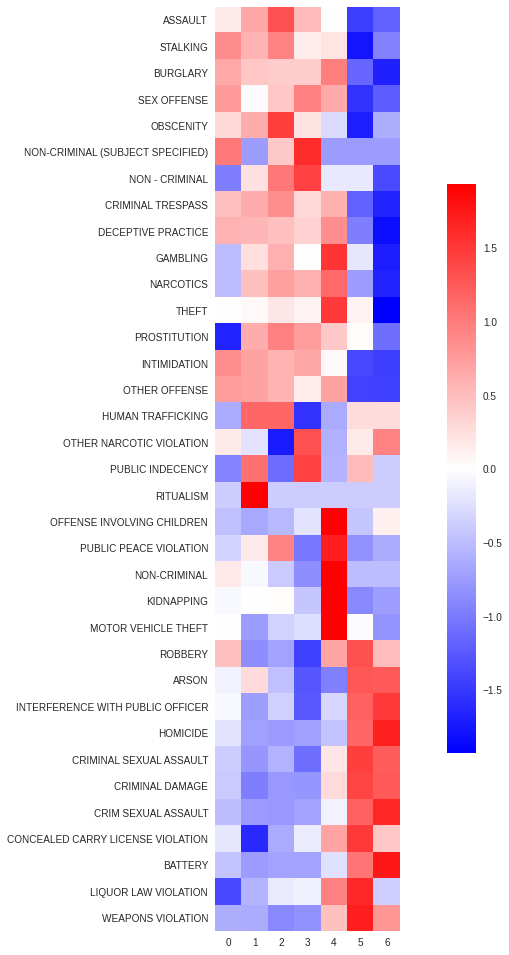

In [22]:
plt.figure(figsize=(17,17))
scale_and_plot(dayofweek_by_type)

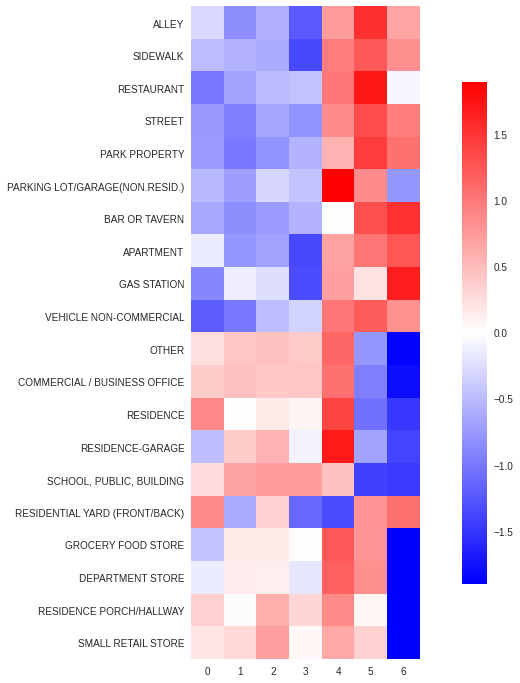

In [23]:
plt.figure(figsize=(15,12))
scale_and_plot(dayofweek_by_location)

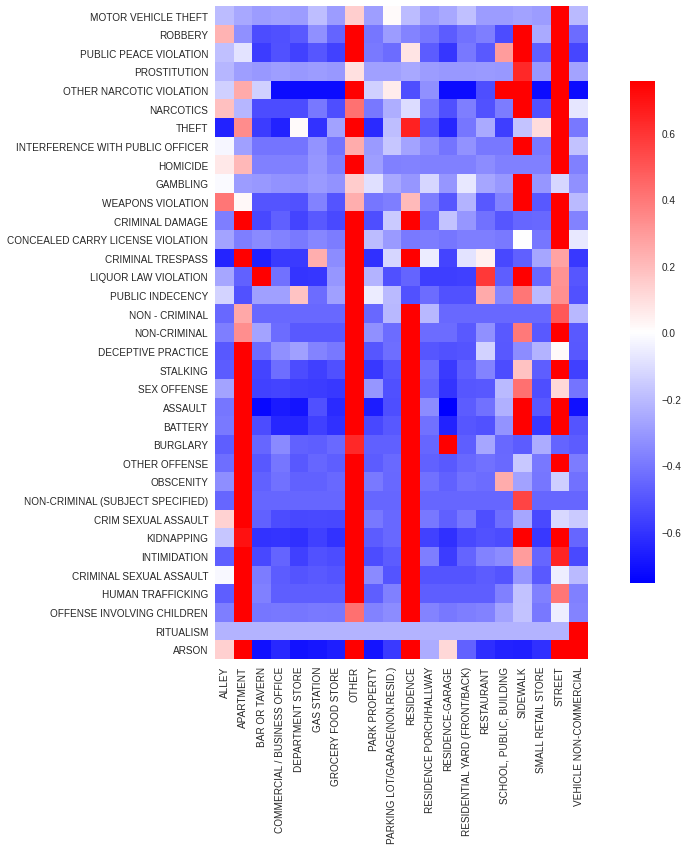

In [32]:
'''
df = normalize(location_by_type)
ix = AC(3).fit(df.T).labels_.argsort() # a trick to make better heatmaps
plt.figure(figsize=(17,13))
plt.imshow(df.T.iloc[ix,:], cmap='Reds')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df.shape[0]), df.index, rotation='vertical')
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.title('Normalized location frequency for each crime')
plt.grid(False)
plt.show()
'''

plt.figure(figsize=(15,12))
plt.xticks(np.arange(location_by_type.shape[0]), location_by_type.index, rotation='vertical')
scale_and_plot(location_by_type.T)

In [25]:
crimes.iloc[(crimes[['Longitude']].values < -88.0).flatten(), crimes.columns=='Longitude'] = 0.0
crimes.iloc[(crimes[['Longitude']].values > -87.5).flatten(), crimes.columns=='Longitude'] = 0.0
crimes.iloc[(crimes[['Latitude']].values < 41.60).flatten(),  crimes.columns=='Latitude'] = 0.0
crimes.iloc[(crimes[['Latitude']].values > 42.05).flatten(),  crimes.columns=='Latitude'] = 0.0
crimes.replace({'Latitude': 0.0, 'Longitude': 0.0}, np.nan, inplace=True)
crimes.dropna(inplace=True)

/home/core/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
/home/core/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:423: UserWarning: The following kwargs were not used by contour: 'bw_adjust'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


(41.6, 42.05)

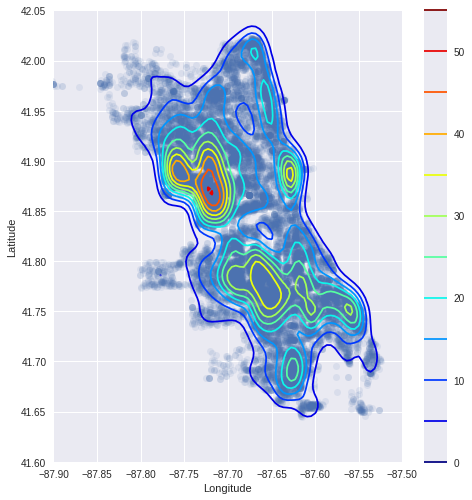

In [26]:
import seaborn as sns

crimes_new = crimes[(crimes['Primary Type'] == 'SEX OFFENSE') | (crimes['Primary Type'] == 'HOMICIDE') | (crimes['Primary Type'] == 'ARSON')]
ax = sns.lmplot(x='Longitude', y='Latitude',
                data= crimes_new[['Longitude','Latitude']],
                fit_reg=False,
                height=7,
                scatter_kws={'alpha':.1})

    
ax = sns.kdeplot(data=crimes_new[['Longitude','Latitude']],
                 cmap="jet", 
                 bw_adjust=.005,
                 #n_levels=10,
                 cbar=True, 
                 shade=False, 
                 shade_lowest=False)
ax.set_xlim(-87.9,-87.5)
ax.set_ylim(41.60,42.05)
#ax.set_axis_off()

In [27]:
ctypes = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT', 'BURGLARY', 'DECEPTIVE PRACTICE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'CRIMINAL TRESPASS', 'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION', 'OFFENSE INVOLVING CHILDREN', 'PROSTITUTION', 'CRIM SEXUAL ASSAULT', 'INTERFERENCE WITH PUBLIC OFFICER', 'SEX OFFENSE', 'HOMICIDE', 'ARSON', 'GAMBLING', 'LIQUOR LAW VIOLATION', 'KIDNAPPING', 'STALKING', 'INTIMIDATION']

/home/core/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
/home/core/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:423: UserWarning: The following kwargs were not used by contour: 'X', 'Y'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


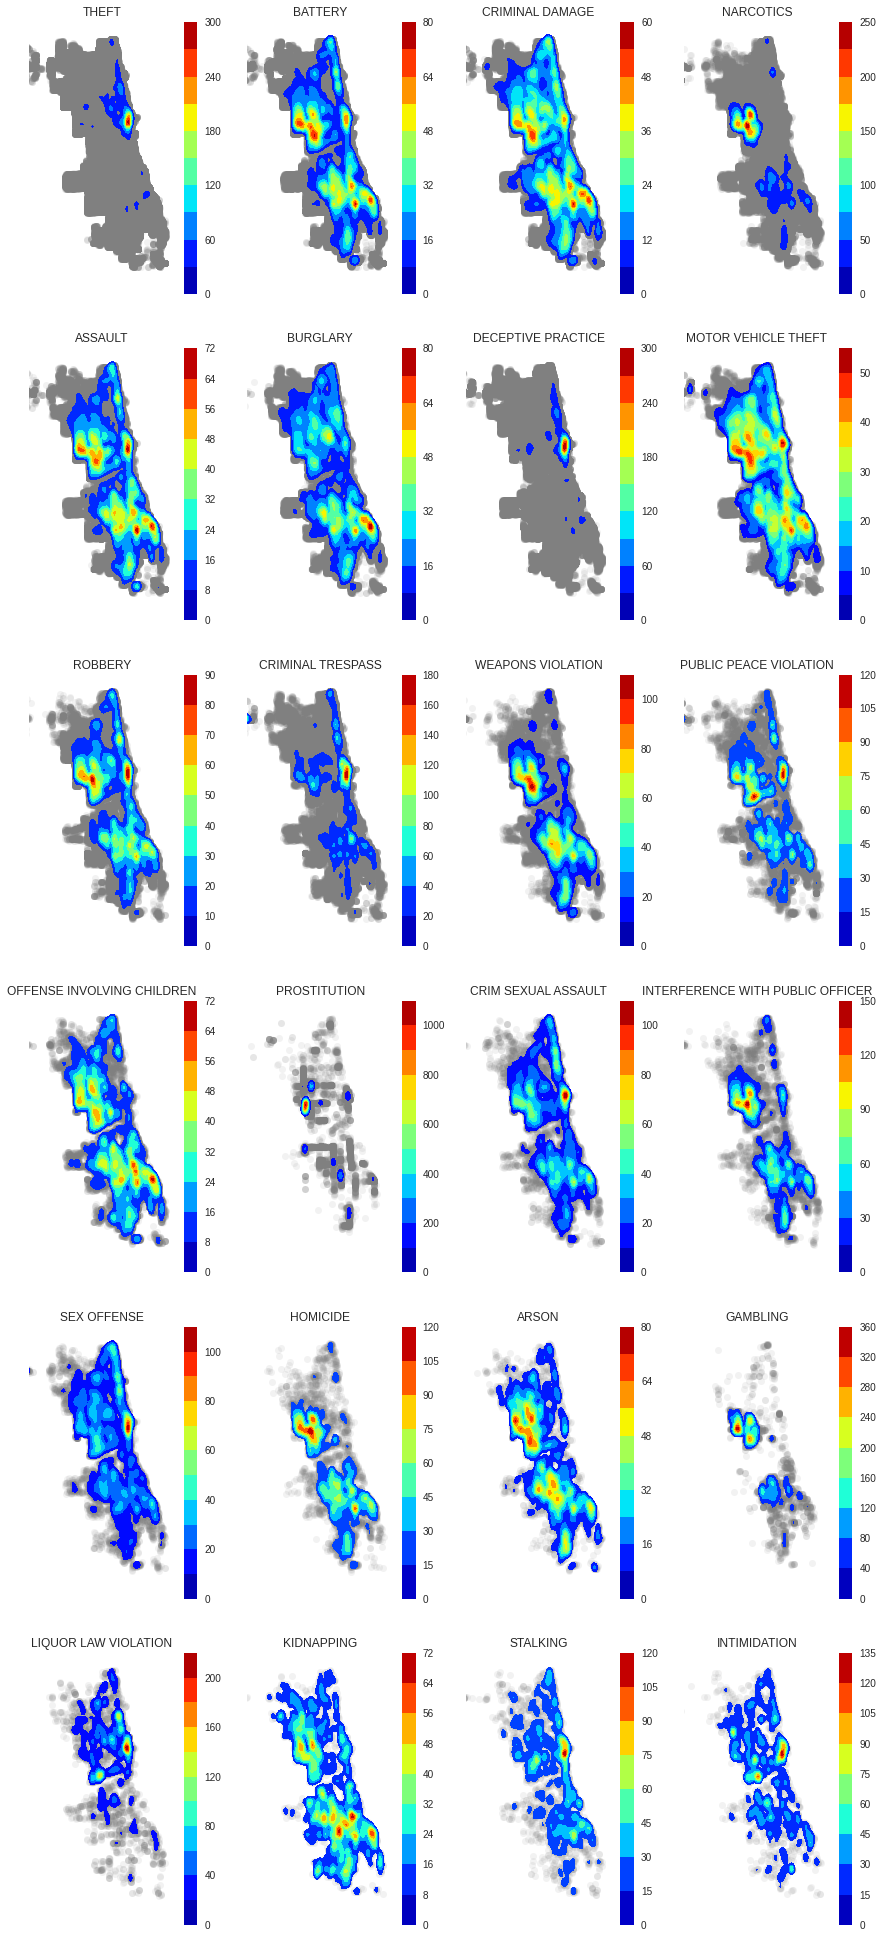

In [28]:
fig = plt.figure(figsize=(15,35))
for i, crime_type in enumerate(ctypes):
    ax = fig.add_subplot(int(np.ceil(float(len(ctypes)) / 4)), 4, i+1)
    crimes_ = crimes[crimes['Primary Type']==crime_type]
    sns.regplot('Longitude', 'Latitude',
               data= crimes_[['Longitude','Latitude']],
               fit_reg=False,
               scatter_kws={'alpha':.1, 'color':'grey'},
               ax=ax)
    sns.kdeplot(X='Longitude', Y='Latitude',
                data= crimes_[['Longitude','Latitude']],
                cmap="jet", 
                bw=.005,
                #n_levels=10,
                cbar=True, 
                shade=True, 
                shade_lowest=False,
                ax = ax)
    ax.set_title(crime_type)
    ax.set_xlim(-87.9,-87.5)
    ax.set_ylim(41.60,42.05)
    ax.set_axis_off()    
plt.show()

In [29]:
from numpy.linalg import svd


class CA(object):
    """Simple corresondence analysis.
    
    Inputs
    ------
    ct : array_like
      Two-way contingency table. If `ct` is a pandas DataFrame object,
      the index and column values are used for plotting.
    Notes
    -----
    The implementation follows that presented in 'Correspondence
    Analysis in R, with Two- and Three-dimensional Graphics: The ca
    Package,' Journal of Statistical Software, May 2007, Volume 20,
    Issue 3.
    """

    def __init__(self, ct):
        self.rows = ct.index.values if hasattr(ct, 'index') else None
        self.cols = ct.columns.values if hasattr(ct, 'columns') else None
        
        # contingency table
        N = np.matrix(ct, dtype=float)

        # correspondence matrix from contingency table
        P = N / N.sum()

        # row and column marginal totals of P as vectors
        r = P.sum(axis=1)
        c = P.sum(axis=0).T

        # diagonal matrices of row/column sums
        D_r_rsq = np.diag(1. / np.sqrt(r.A1))
        D_c_rsq = np.diag(1. / np.sqrt(c.A1))

        # the matrix of standarized residuals
        S = D_r_rsq * (P - r * c.T) * D_c_rsq

        # compute the SVD
        U, D_a, V = svd(S, full_matrices=False)
        D_a = np.asmatrix(np.diag(D_a))
        V = V.T

        # principal coordinates of rows
        F = D_r_rsq * U * D_a

        # principal coordinates of columns
        G = D_c_rsq * V * D_a

        # standard coordinates of rows
        X = D_r_rsq * U

        # standard coordinates of columns
        Y = D_c_rsq * V

        # the total variance of the data matrix
        inertia = sum([(P[i,j] - r[i,0] * c[j,0])**2 / (r[i,0] * c[j,0])
                       for i in range(N.shape[0])
                       for j in range(N.shape[1])])

        self.F = F.A
        self.G = G.A
        self.X = X.A
        self.Y = Y.A
        self.inertia = inertia
        self.eigenvals = np.diag(D_a)**2

    def plot(self):
        """Plot the first and second dimensions."""
        xmin, xmax = None, None
        ymin, ymax = None, None
        if self.rows is not None:
            for i, t in enumerate(self.rows):
                x, y = self.F[i,0], self.F[i,1]
                plt.text(x, y, t, va='center', ha='center', color='r')
                xmin = min(x, xmin if xmin else x)
                xmax = max(x, xmax if xmax else x)
                ymin = min(y, ymin if ymin else y)
                ymax = max(y, ymax if ymax else y)
        else:
            plt.plot(self.F[:, 0], self.F[:, 1], 'ro')

        if self.cols is not None:
            for i, t in enumerate(self.cols):
                x, y = self.G[i,0], self.G[i,1]
                plt.text(x, y, t, va='center', ha='center', color='b')
                xmin = min(x, xmin if xmin else x)
                xmax = max(x, xmax if xmax else x)
                ymin = min(y, ymin if ymin else y)
                ymax = max(y, ymax if ymax else y)
        else:
            plt.plot(self.G[:, 0], self.G[:, 1], 'bs')

        if xmin and xmax:
            pad = (xmax - xmin) * 0.1
            plt.xlim(xmin - pad, xmax + pad)
        if ymin and ymax:
            pad = (ymax - ymin) * 0.1
            plt.ylim(ymin - pad, ymax + pad)

        plt.grid()
        plt.xlabel('Dim 1')
        plt.ylabel('Dim 2')

    def scree_diagram(self, perc=True, *args, **kwargs):
        """Plot the scree diagram."""
        eigenvals = self.eigenvals
        xs = np.arange(1, eigenvals.size + 1, 1)
        ys = 100. * eigenvals / eigenvals.sum() if perc else eigenvals
        plt.plot(xs, ys, *args, **kwargs)
        plt.xlabel('Dimension')
        plt.ylabel('Eigenvalue' + (' [%]' if perc else ''))

In [30]:

ctypexdistrict = crimes.pivot_table(values='ID', index='Primary Type', columns='District', aggfunc=np.size).fillna(0)
ctypexlocation = crimes.pivot_table(values='ID', index='Primary Type', columns='Location Description', aggfunc=np.size).fillna(0)
ctypexhour = crimes.pivot_table(values='ID', index='Primary Type', columns=crimes.index.hour, aggfunc=np.size).fillna(0)
ctypexmonth = crimes.pivot_table(values='ID', index='Primary Type', columns=crimes.index.month, aggfunc=np.size).fillna(0)
ctypexyear = crimes.pivot_table(values='ID', index='Primary Type', columns=crimes.index.year, aggfunc=np.size).fillna(0)
ctypexdayofweek = crimes.pivot_table(values='ID', index='Primary Type', columns=crimes.index.dayofweek, aggfunc=np.size).fillna(0)

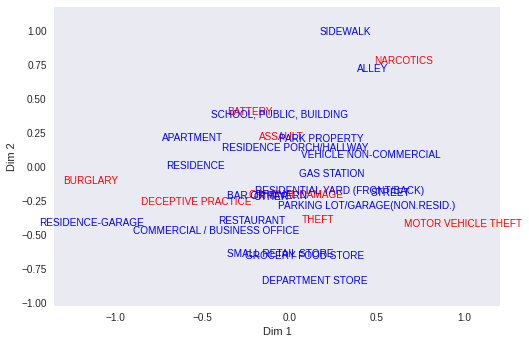

In [31]:
ctypes_short = ctypes[:8]
ca = CA(ctypexlocation.loc[ctypes_short])

plt.figure(100)
ca.plot()

# plt.figure(101)
# ca.scree_diagram()
# plt.show()

ARIMA

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3566362 entries, 2010-01-01 00:00:00 to 2022-12-07 23:59:00
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Block                 object        
 3   Primary Type          category      
 4   Description           category      
 5   Location Description  category      
 6   Arrest                bool          
 7   Domestic              bool          
 8   District              float64       
 9   X Coordinate          float64       
 10  Y Coordinate          float64       
 11  Latitude              float64       
 12  Longitude             float64       
dtypes: bool(2), category(3), datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 261.9+ MB
Date
2010-01-01    1355
2010-01-02     792
2010-01-03     759
2010-01-04     855
2010-01-05     910
              ... 


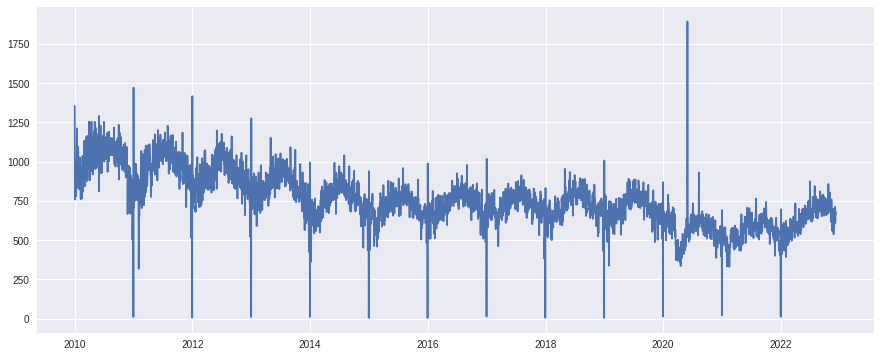

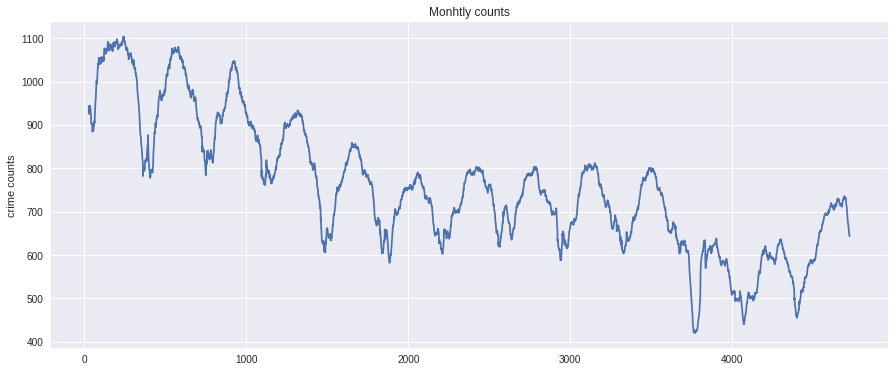

<Figure size 576x396 with 0 Axes>

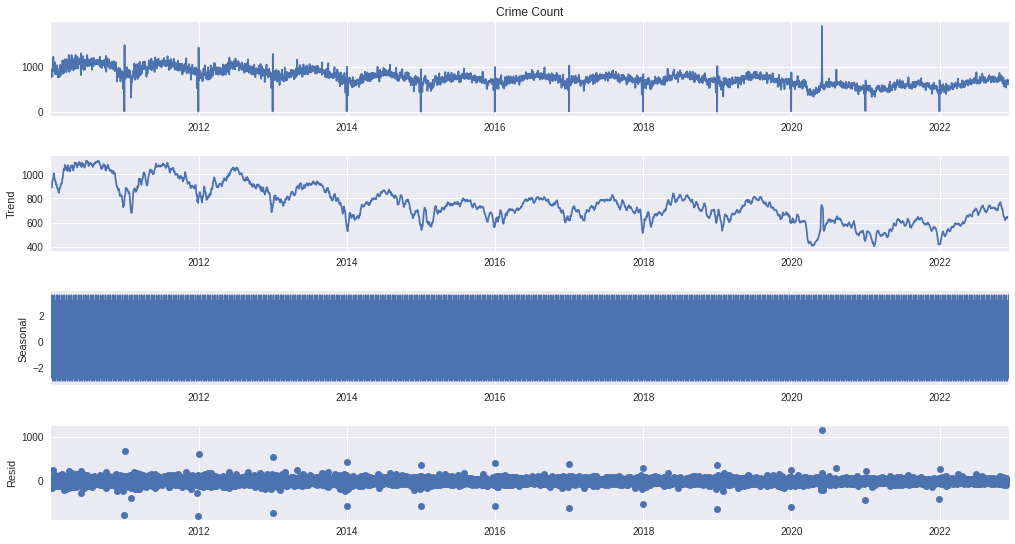

In [33]:
import time
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import IsolationForest


from sklearn.metrics import mean_absolute_error
p_params = range(0,25,8)
q_params = range(0,3,1)

#crimes_temp=crimes[:500000]

df = pd.concat([crimes])
df.info()

print(df.resample('1D').size())

#异常值检查处理
def number_of_outliers(df):
    #df = df.select_dtypes(exclude = 'object')
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


def lower_upper_range(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

'''
def isolutionforest(DO):
    
    DO_temp = []
    for i in range(0, len(DO)):
        DO_temp.append([DO[i]])

    rng = np.random.RandomState(42)
    clf = IsolationForest(random_state=rng, contamination=0.01)  # contamination为异常样本比例
    clf.fit(DO_temp)

    DO_copy = DO_temp
    m = 0

    pre = clf.predict(DO_temp)
    for i in range(len(pre)):
        if pre[i] == -1:
            DO_copy = np.delete(DO_copy, i - m, 0)
            plt.scatter(i,DO_temp[i],c='red')
            print(i)
            m += 1
    print("m",m)
    plt.plot(DO_temp)
    plt.show()
    print(DO_copy)
    return DO_copy
'''


fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(df.resample('1D').size())
df_resampled = pd.DataFrame(df.resample('1D').size().reset_index())
df_resampled.columns =['Date','Crime Count']
df_resampled

fig, ax = plt.subplots(figsize=(15, 6))
df_resampled["Crime Count"].rolling(30).mean().plot(ax=ax,ylabel="crime counts",title="Monhtly counts")
df_resampled.index = pd.DatetimeIndex(df_resampled.Date,freq="D")
df_resampled.drop("Date",axis=1,inplace=True)
df_resampled.head()
df_resampled["Crime Count.L1"]=df_resampled["Crime Count"].shift(1)
df_resampled.dropna(inplace=True)
df_resampled.head()
df_resampled.corr()
target = "Crime Count"
y = df_resampled[target]
X = df_resampled.drop(columns=target)
cutoff =int(len(X)*0.8)
X_train,y_train=X.iloc[:cutoff],y.iloc[:cutoff]
X_test,y_test=X.iloc[cutoff:],y.iloc[cutoff:]



#参考链接 https://zhuanlan.zhihu.com/p/35282988
decomposition = seasonal_decompose(df_resampled["Crime Count"], period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

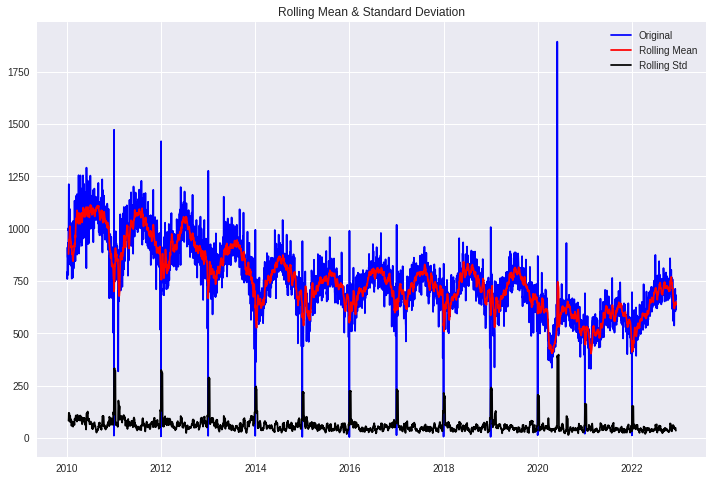

Results of Dickey-Fuller Test:
Test Statistic                   -2.299801
p-value                           0.172032
#Lags Used                       31.000000
Number of Observations Used    4691.000000
Critical Value (1%)              -3.431745
Critical Value (5%)              -2.862156
Critical Value (10%)             -2.567098
dtype: float64


In [34]:
from statsmodels.tsa.stattools import adfuller   #Dickey-Fuller test
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')  #autolag : {‘AIC’, ‘BIC’, ‘t-stat’, None}
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(df_resampled["Crime Count"])

In [35]:
import plotly.express as px

mae_grid = dict()
# Outer loop: Iterate through possible values for `p`
for p in p_params:
    # Create key-value pair in dict. Key is `p`, value is empty list.
    mae_grid[p] = list()
    # Inner loop: Iterate through possible values for `q`
    for q in q_params:
        # Combination of hyperparameters for model(note that the second element in "order" is always 0 for ARIMA models)
        order = (p, 0, q)
        # Note start time
        start_time = time.time()
        # Train model
        model = ARIMA(y_train,order=order).fit()
        # Calculate model training time
        elapsed_time = round(time.time() - start_time, 2)
        print(f"Trained ARIMA {order} in {elapsed_time} seconds.")
        # Generate in-sample (training) predictions
        y_pred = model.predict()
        # Calculate training MAE
        mae = mean_absolute_error(y_train,y_pred)
        # Append MAE to list in dictionary
        mae_grid[p].append(mae)

print()
print(mae_grid)

mae_df = pd.DataFrame(mae_grid)
mae_df.round(4)
fig, ax = plt.subplots(figsize=(15, 12))
model.plot_diagnostics(fig=fig)

y_pred_wfv = pd.Series()
history = y_train.copy()
for i in range(len(y_test)):
    model = ARIMA(history,order=(16,0,0)).fit()
    next_pred = model.forecast()
    y_pred_wfv = y_pred_wfv.append(next_pred)
    history = history.append(y_test[next_pred.index])

test_mae = mean_absolute_error(y_test,y_pred_wfv)
print("Test MAE (walk forward validation):", round(test_mae, 2))
df_predictions = pd.DataFrame({"y_test":y_test,"y_pred_wfv":y_pred_wfv})
fig = px.line(df_predictions,labels={"value":"Crime count"})
fig.show()

Trained ARIMA (0, 0, 0) in 0.25 seconds.
Trained ARIMA (0, 0, 1) in 0.33 seconds.
Trained ARIMA (0, 0, 2) in 0.54 seconds.
Trained ARIMA (8, 0, 0) in 0.89 seconds.
Trained ARIMA (8, 0, 1) in 0.56 seconds.
Trained ARIMA (8, 0, 2) in 1.61 seconds.
Trained ARIMA (16, 0, 0) in 1.65 seconds.
Trained ARIMA (16, 0, 1) in 6.25 seconds.


/home/core/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Trained ARIMA (16, 0, 2) in 10.39 seconds.
Trained ARIMA (24, 0, 0) in 4.76 seconds.
Trained ARIMA (24, 0, 1) in 7.83 seconds.
